<a href="https://colab.research.google.com/github/raihanqodri/DQLab/blob/raihanqodri-Capstone/EDA_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA (Exploratory Data Analyst)**





## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading Data
disaster = pd.read_csv('/content/drive/MyDrive/TETRIS_python/bencana_di_Indonesia.csv')

N, P = disaster.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
disaster.head()

baris =  842 , Kolom (jumlah variabel) =  12


,DisNo.,Year,Month,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",Location
0,2000-0010-IDN,2000,Januari,Technological,Transport,Road,Road,13,22,0,0,Jawa Tengah
1,2000-0011-IDN,2000,Januari,Technological,Transport,Road,Road,13,333,0,0,Jawa Tengah
2,2000-0082-IDN,2000,Februari,Natural,Hydrological,Mass movement (wet),Mudslide,34,84377,11600,19714,Jawa Tengah
3,2000-0101-IDN,2000,Maret,Technological,Transport,Road,Road,26,31,0,0,Jawa Tengah
4,2000-0108-IDN,2000,Januari,Natural,Biological,Epidemic,Viral disease,10,1516,0,0,Jakarta


## Cek Kelengkapan Data dan Integritas Data

In [ ]:
# Cek informasi data
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   DisNo.                             842 non-null    object
 1   Year                               842 non-null    int64 
 2   Month                              842 non-null    object
 3   Disaster Group                     842 non-null    object
 4   Disaster Subgroup                  842 non-null    object
 5   Disaster Type                      842 non-null    object
 6   Disaster Subtype                   842 non-null    object
 7   Total Deaths                       842 non-null    int64 
 8   Total Affected                     842 non-null    int64 
 9   Total Damage ('000 US$)            842 non-null    int64 
 10  Total Damage, Adjusted ('000 US$)  842 non-null    int64 
 11  Location                           842 non-null    object
dtypes: int64

In [ ]:
disaster.describe()

,Year,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
count,842.000000,842.000000,8.420000e+02,8.420000e+02,8.420000e+02
mean,2012.133017,524.942993,4.602117e+05,6.112302e+04,8.236804e+04
std,7.273582,8080.363024,2.638840e+06,3.394812e+05,4.837741e+05
min,2000.000000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,2006.000000,7.000000,1.000000e+03,0.000000e+00,0.000000e+00
50%,2013.000000,15.000000,1.200000e+04,0.000000e+00,0.000000e+00
75%,2019.000000,40.000000,7.253400e+04,0.000000e+00,0.000000e+00
max,2023.000000,165708.000000,1.875000e+07,4.451600e+06,6.897286e+06


### Cek Duplikasi Data

In [ ]:
print(disaster.shape)
print("jumlah data yang duplikat", disaster.duplicated().sum())
disaster[disaster.duplicated() == True].head()

(842, 12)
jumlah data yang duplikat 0


,DisNo.,Year,Month,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",Location


### Cek Noise Variable

In [ ]:
varObjects = disaster.select_dtypes(include = ['object'])
varObjects.head()

,DisNo.,Month,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Location
0,2000-0010-IDN,Januari,Technological,Transport,Road,Road,Jawa Tengah
1,2000-0011-IDN,Januari,Technological,Transport,Road,Road,Jawa Tengah
2,2000-0082-IDN,Februari,Natural,Hydrological,Mass movement (wet),Mudslide,Jawa Tengah
3,2000-0101-IDN,Maret,Technological,Transport,Road,Road,Jawa Tengah
4,2000-0108-IDN,Januari,Natural,Biological,Epidemic,Viral disease,Jakarta


In [ ]:
varNum = disaster.select_dtypes(include = ['int', 'float'])
varNum.head()

,Year,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
0,2000,13,22,0,0
1,2000,13,333,0,0
2,2000,34,84377,11600,19714
3,2000,26,31,0,0
4,2000,10,1516,0,0


In [ ]:
# Mendapatkan nilai unique dari semua kolom
catVar = disaster.select_dtypes(include = ['object', 'category'])
numVar = disaster.select_dtypes(include = ['int', 'float'])

for col in catVar.columns:
    print(col,': ', set(catVar[col].unique()))

#Tidak ada kelihatan yang aneh

DisNo. :  {'2000-0844-IDN', '2022-0324-IDN', '2015-0112-IDN', '2003-0067-IDN', '2003-0814-IDN', '2002-0615-IDN', '2008-0189-IDN', '2005-0202-IDN', '2015-0077-IDN', '2019-0210-IDN', '2008-0312-IDN', '2022-0845-IDN', '2001-0462-IDN', '2004-0399-IDN', '2004-0718-IDN', '2017-0393-IDN', '2001-0171-IDN', '2006-0001-IDN', '2021-0032-IDN', '2011-0493-IDN', '2007-0001-IDN', '2015-0557-IDN', '2003-0016-IDN', '2007-0087-IDN', '2001-0046-IDN', '2001-0041-IDN', '2001-0407-IDN', '2006-0231-IDN', '2015-0056-IDN', '2022-0012-IDN', '2007-0088-IDN', '2004-0177-IDN', '2002-0035-IDN', '2003-0531-IDN', '2016-0415-IDN', '2020-0225-IDN', '2003-0254-IDN', '2005-0495-IDN', '2020-0036-IDN', '2000-0268-IDN', '2013-0022-IDN', '2013-0455-IDN', '2019-0377-IDN', '2008-0635-IDN', '2020-0486-IDN', '2020-0052-IDN', '2013-0020-IDN', '2021-0720-IDN', '2023-0820-IDN', '2004-0723-IDN', '2003-0275-IDN', '2003-0285-IDN', '2016-0306-IDN', '2009-0479-IDN', '2000-0926-IDN', '2004-0612-IDN', '2010-0213-IDN', '2003-0106-IDN', '20

In [ ]:
# import Module yang dibutuhkan untuk Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

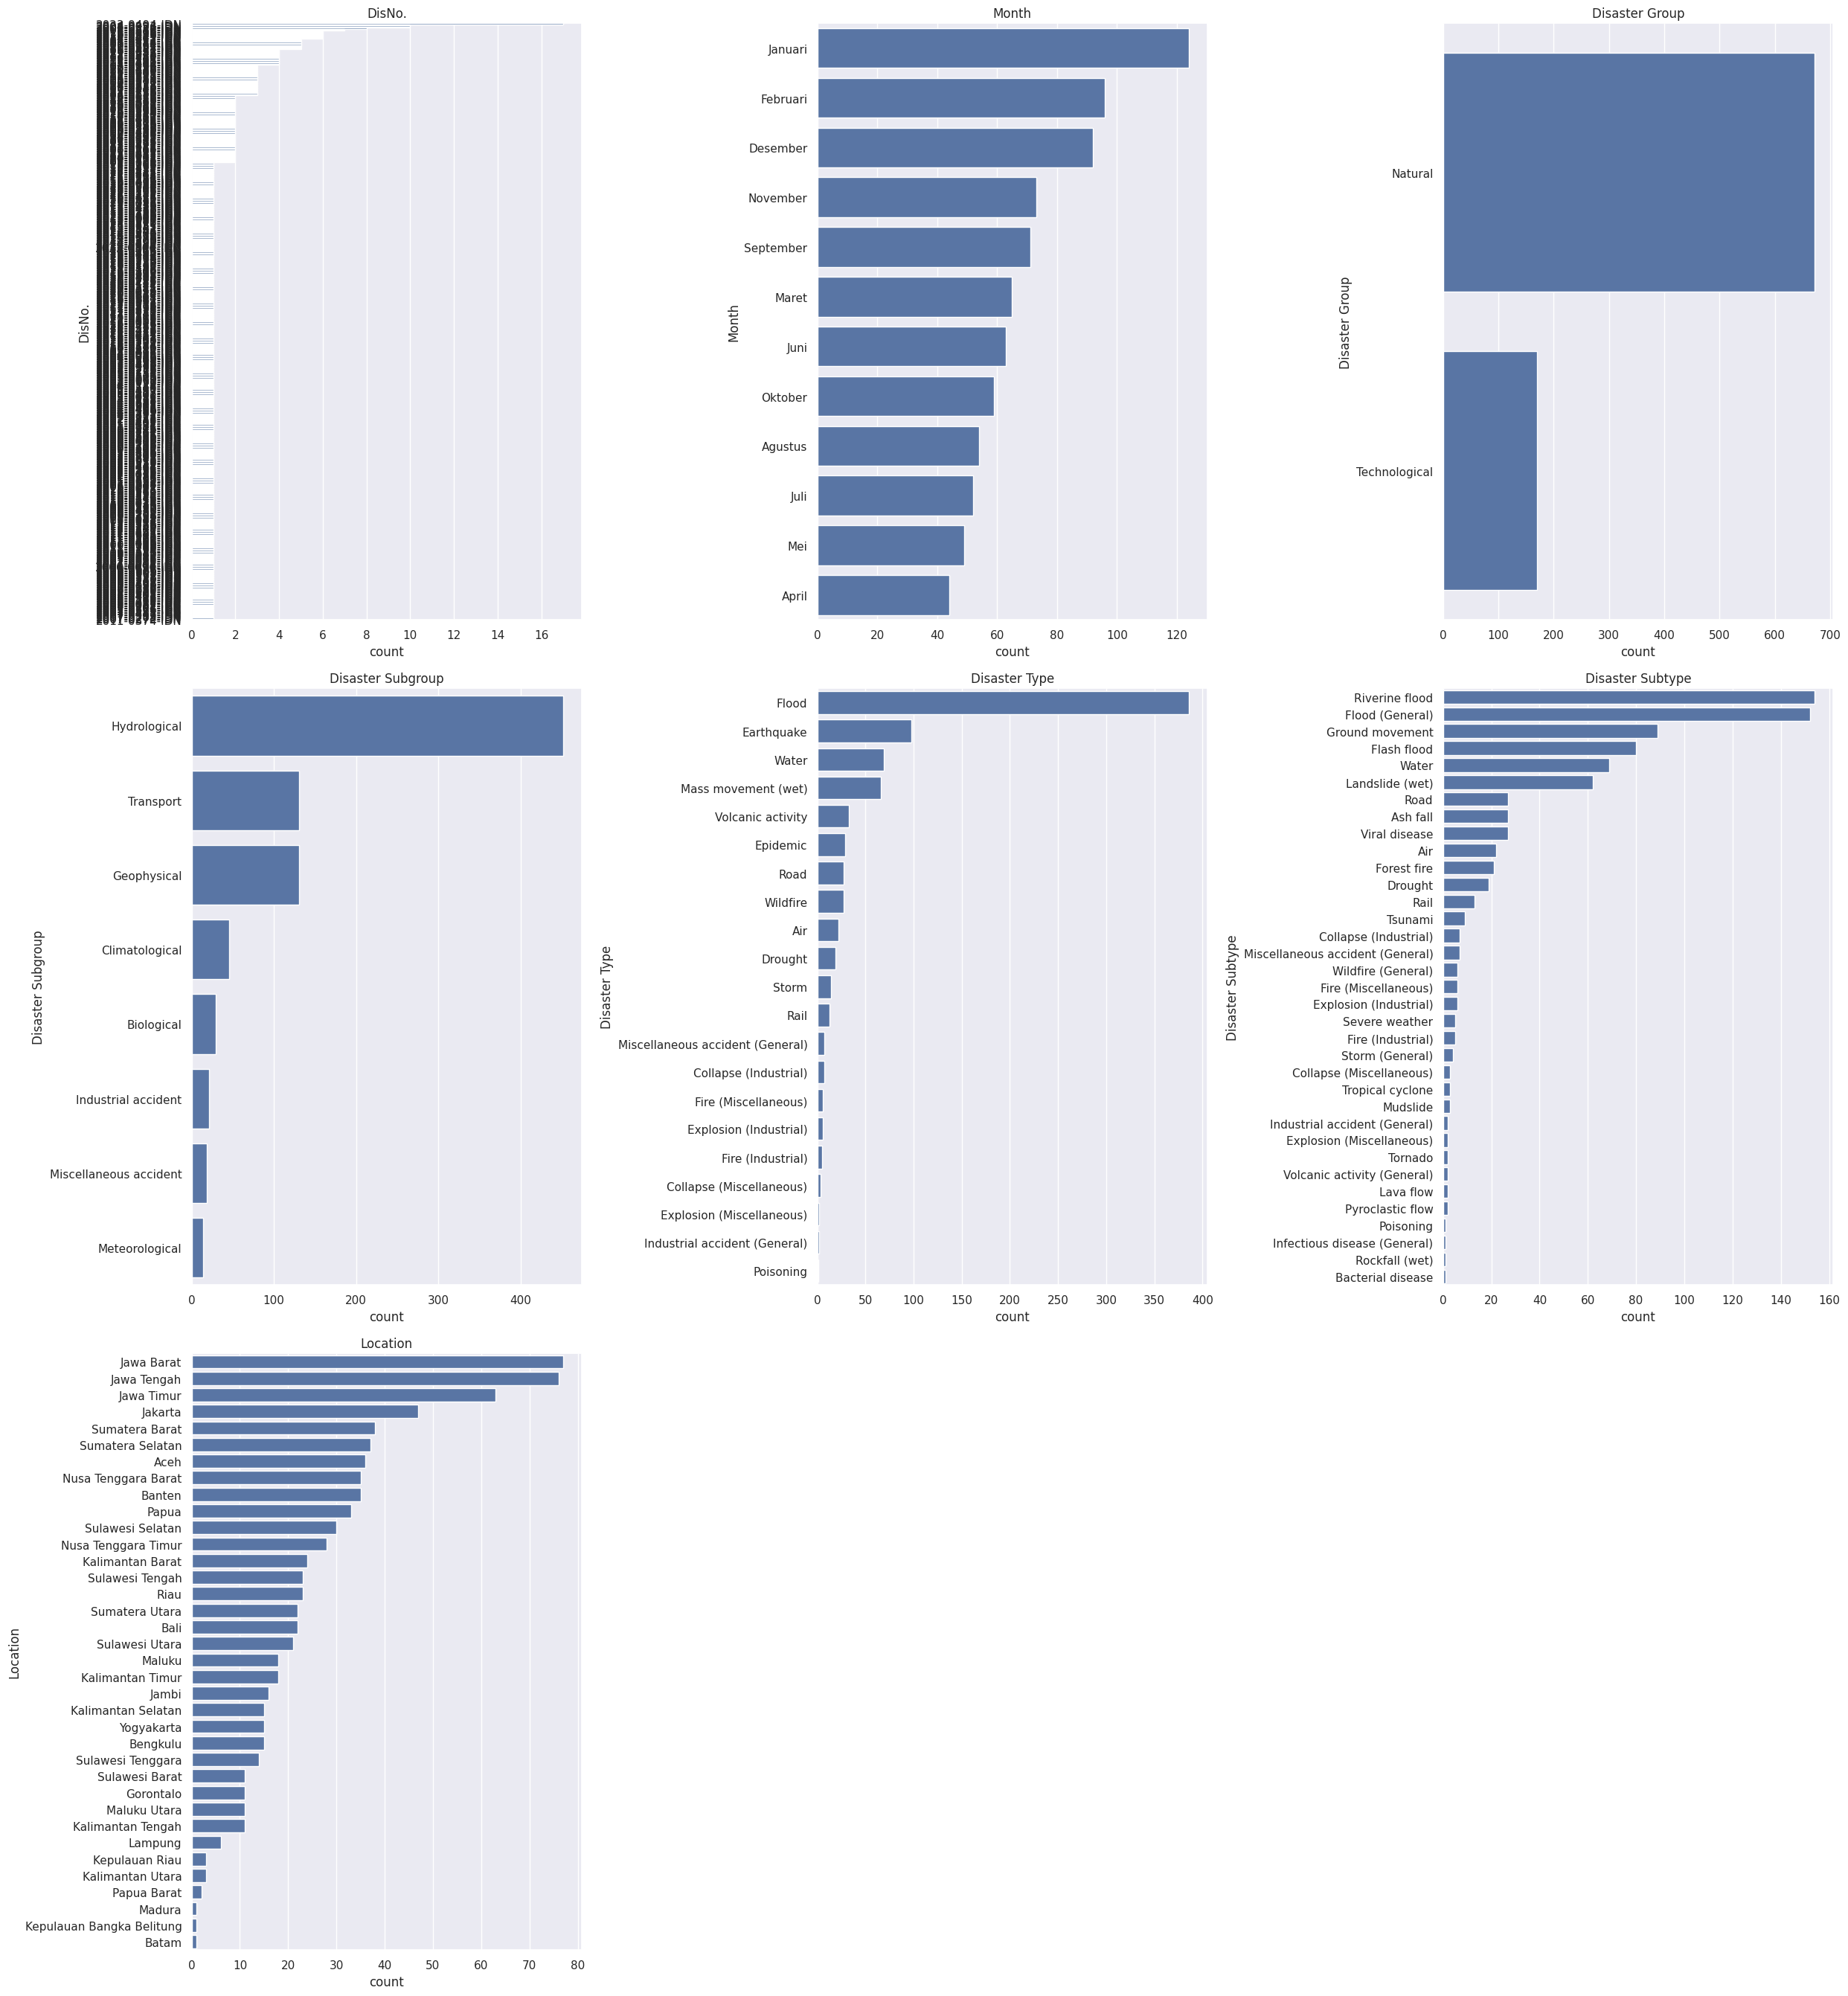

In [ ]:
# Menghitung jumlah baris dan kolom subplot
num_variables = len(catVar.columns)
num_cols = 3  # Sesuaikan sesuai kebutuhan
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 9 * num_rows))

# Menggunakan Seaborn untuk membuat countplot dalam grid
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = catVar.columns[i]
        if catVar[col].dtype == 'bool':
            sns.countplot(y=col, data=catVar.astype({col: 'object'}), ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        else:
            sns.countplot(y=col, data=catVar, ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.show()

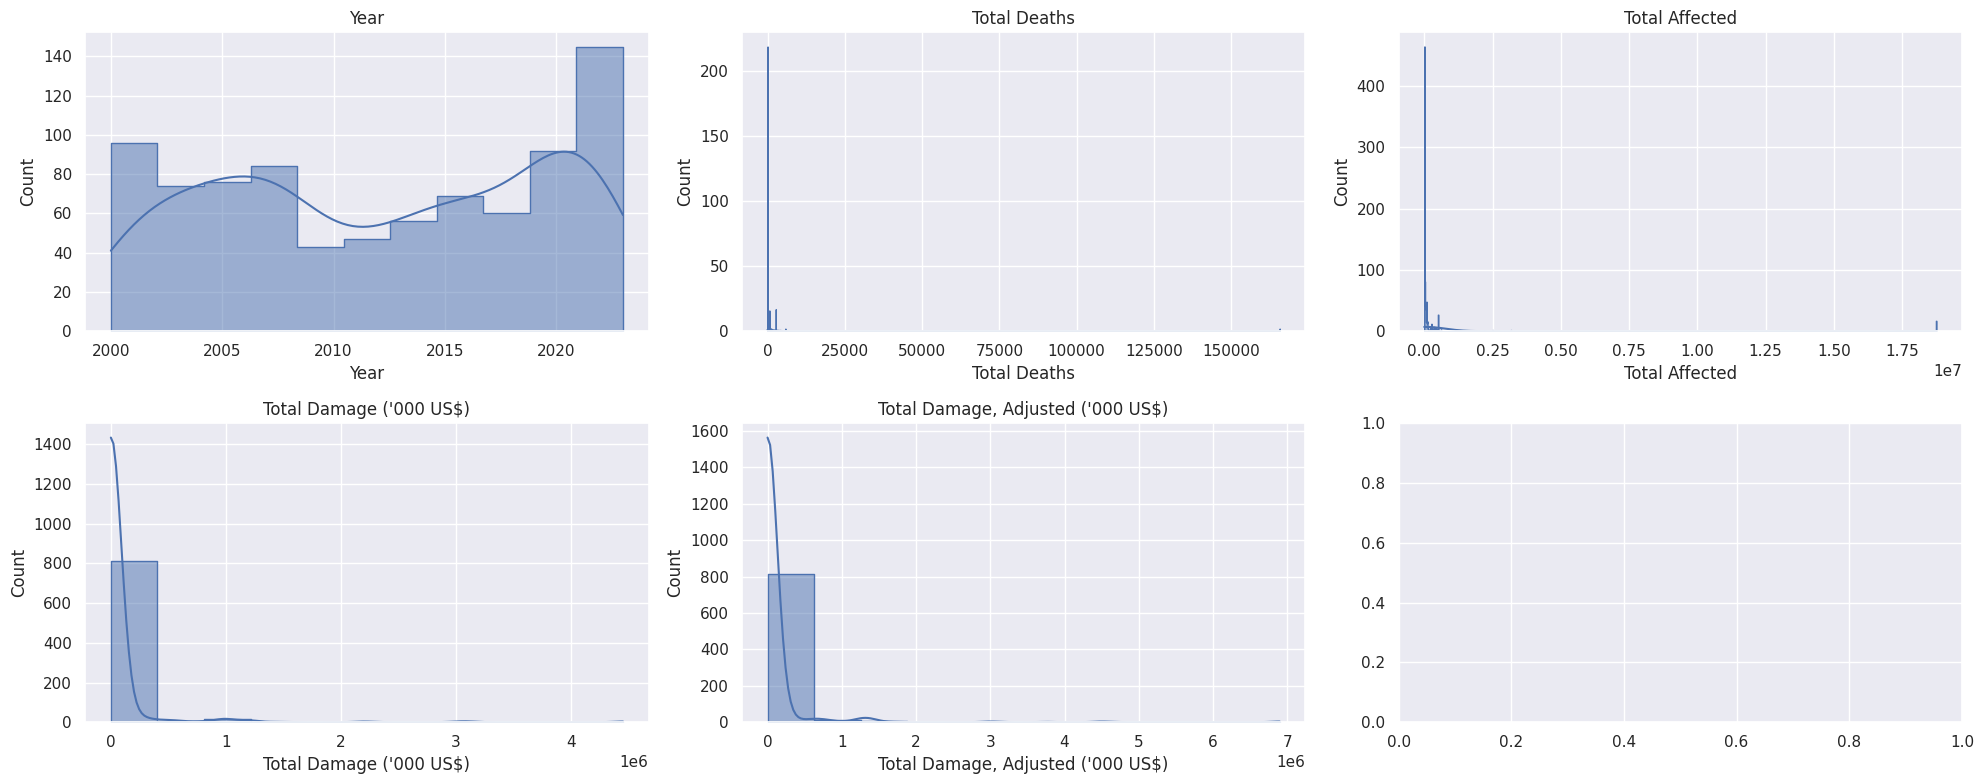

In [ ]:
# Membuat grid histogram dengan Seaborn
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# Menggunakan Seaborn untuk membuat histogram dalam grid
for i in range(len(numVar.columns)):
    row, col = divmod(i, 3)
    sns.histplot(numVar.iloc[:, i], kde=True, ax=axes[row, col], element="step", stat="count", common_norm=False)
    axes[row, col].set_title(numVar.columns[i])

# Mengatur layout
plt.tight_layout()
plt.show()

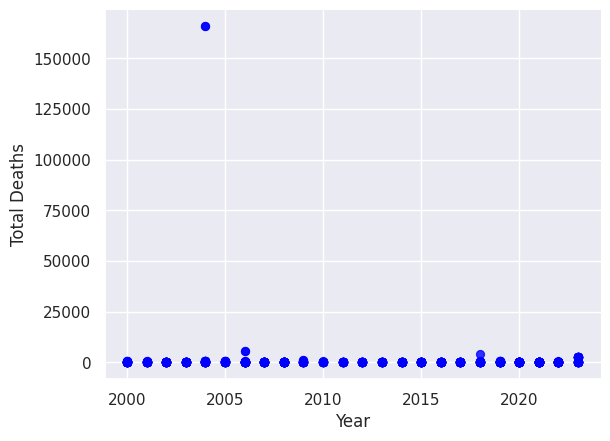

In [ ]:
# Korelasi antara total kematian dengan tahun bencana
from matplotlib import pyplot as plt
disaster.plot(kind='scatter', x='Year', y='Total Deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
# Korban terbanyak terjadi pada bencana tahun 2004

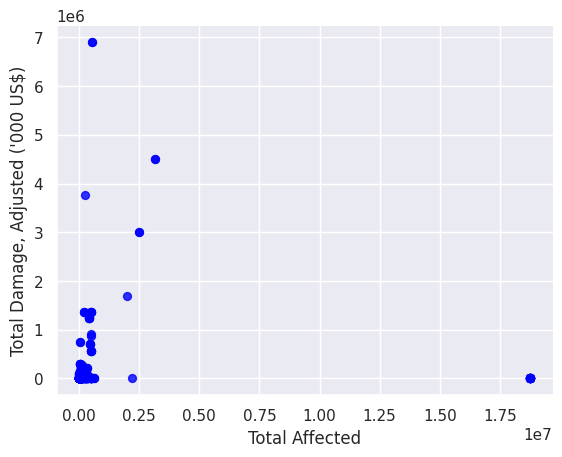

In [ ]:
# Total kerugian yang disesuaikan vs total korban yang terdampak
from matplotlib import pyplot as plt
disaster.plot(kind='scatter', x='Total Affected', y="Total Damage, Adjusted ('000 US$)", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
# Cenderung tidak saling berkorelasi

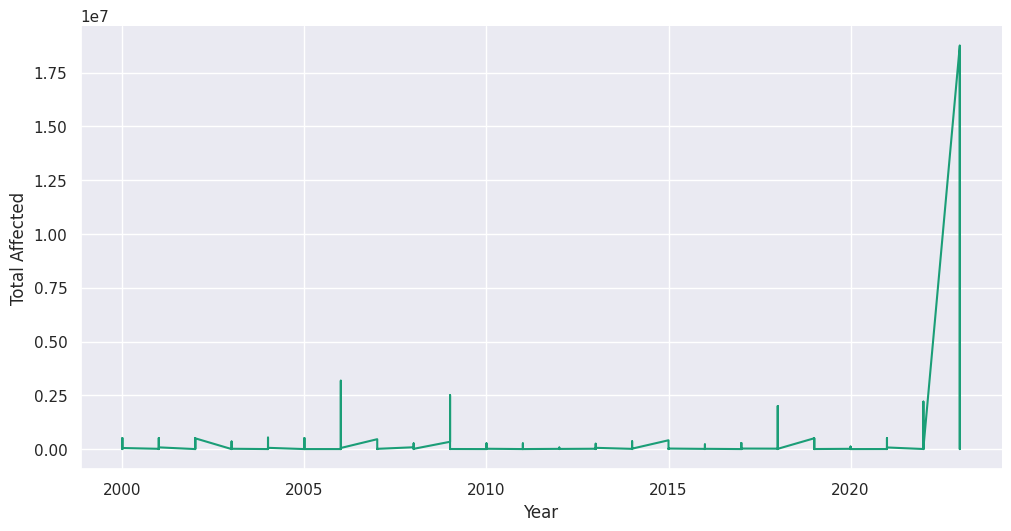

In [ ]:
# Melihat toal korban terdampak terbanyak berdasarkan tahun terjadinya bencana
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total Affected']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = varNum.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total Affected')
# Pada tahun 2023 terdapat korban terdampak terbanyak sepanjang tahun 2000 - 2023
# Frekuensi terbanyak terjadinya bencana memang pada tahun 2023

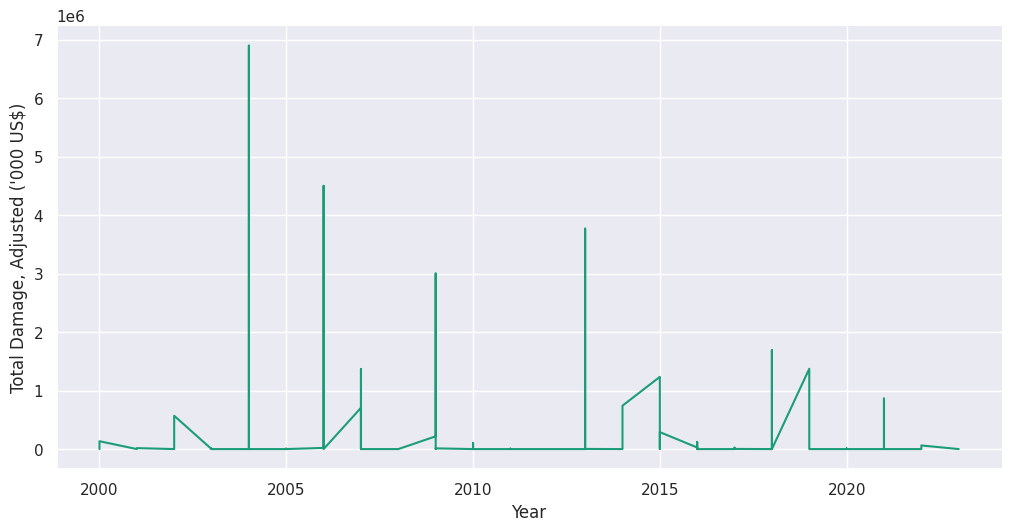

In [ ]:
# Melihat total kerugian terbesar akibat bencana sepanjang tahun 2000 - 2023
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series["Total Damage, Adjusted ('000 US$)"]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = varNum.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel("Total Damage, Adjusted ('000 US$)")
# Total kerugian yang sudah disesuaikan dengan inflasi terbesar pada tahun 2004, kemudian 2006, dan 2013

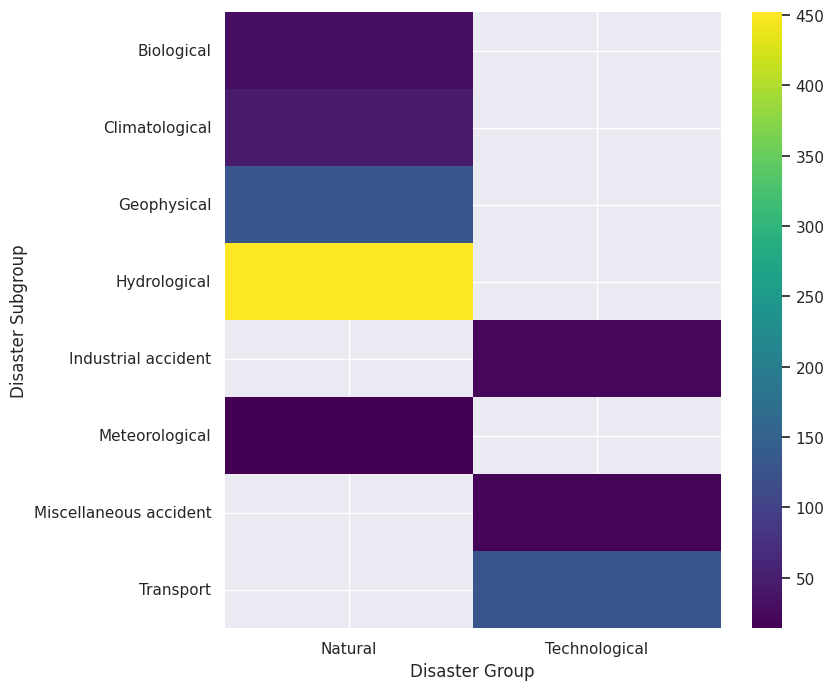

In [ ]:
# Disaster group vs subgroup
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Disaster Subgroup'].value_counts()
    for x_label, grp in varObjects.groupby('Disaster Group')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Disaster Group')
_ = plt.ylabel('Disaster Subgroup')
#Pada kelompok bencana natural, frekuensi terbanyak terjadinya bencana adalah kejadian Hydrological, dan yang paling sedikit kejadian Biological
#Pada kelompok bencana technological, frekuensi terbanyak terjadinya bencana adalah Transport, dan paling sedikit adalah Miscellaneous accident

<ipython-input-40-cd1fc5d62b93>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(disaster, x='Year', y='Disaster Group', inner='box', palette='Dark2')


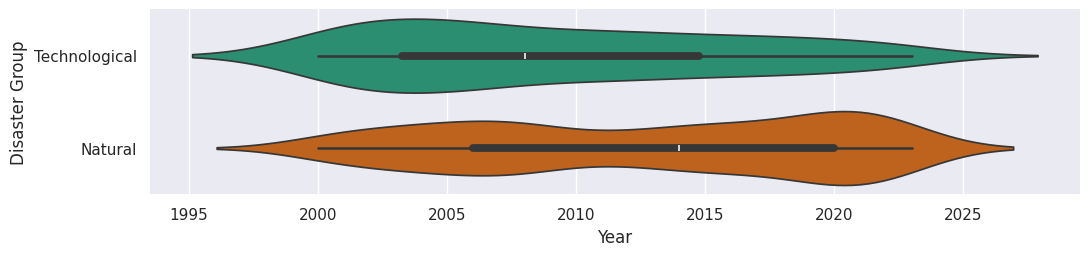

In [ ]:
# Melihat kelompok bencana antara natural dengan technological dari rata rata terjadinya bencana sepanjang tahun 2000 - 2023
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(disaster['Disaster Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(disaster, x='Year', y='Disaster Group', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
# Rata-rata terjadinya bencana technological pada tahun 2008
# Rata - rata terjadinya bencana natural pada tahun 2014

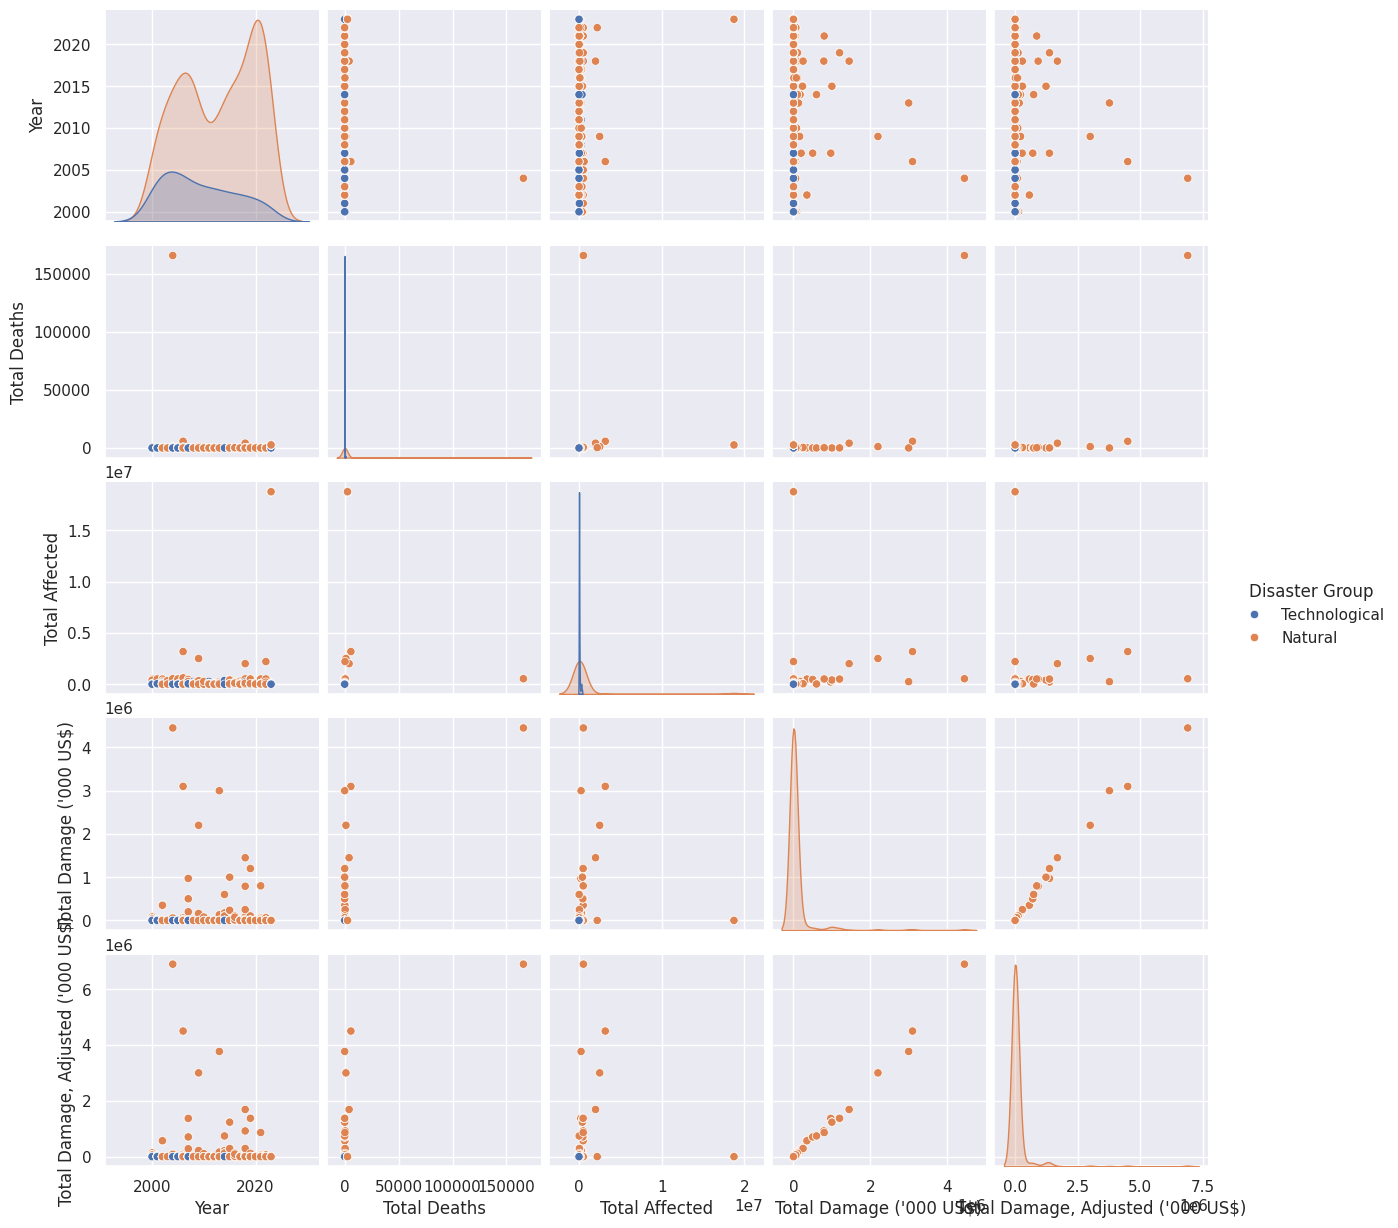

In [ ]:
s = sns.pairplot(disaster, hue='Disaster Group')